# Método KNN: IMC Personas

In [1]:
# 0. Importar librerías
%pip install mplcursors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

Note: you may need to restart the kernel to use updated packages.


La persona con peso 65.0 kg y altura 1.68 m está en la categoría: Delgadez
La persona con peso 78.0 kg y altura 1.82 m está en la categoría: Normal
La persona con peso 55.0 kg y altura 1.6 m está en la categoría: Delgadez
La persona con peso 85.0 kg y altura 1.75 m está en la categoría: Normal
La persona con peso 100.0 kg y altura 1.85 m está en la categoría: Normal
La persona con peso 90.0 kg y altura 1.7 m está en la categoría: Sobrepeso


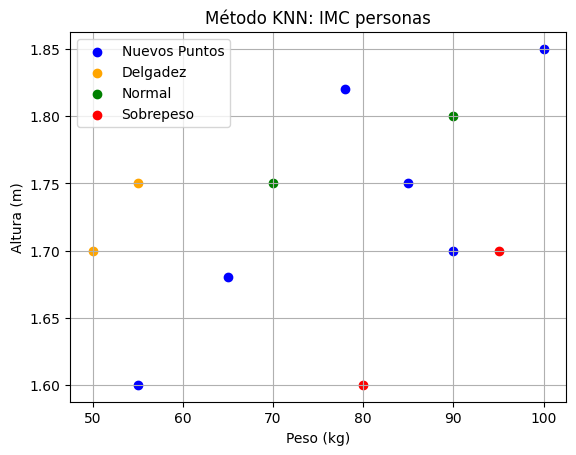

In [2]:
# 1. Definir características (peso y altura) y etiquetas (0: Delgadez, 1: Normal, 2: Sobrepeso)
X = np.array([[50, 1.70], [55, 1.75], [80, 1.60], [90, 1.80], [70, 1.75], [95, 1.70]])
y = np.array([0, 0, 2, 1, 1, 2])

# 2. Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Crear el clasificador KNN con k=3
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# 4. Entrenar el clasificador con los datos normalizados
knn.fit(X_scaled, y)

# 5. Definir nuevos puntos de datos (peso y altura) y normalizarlos
nuevo_punto = np.array([[65, 1.68], [78, 1.82], [55, 1.60], [85, 1.75], [100, 1.85], [90, 1.70]])
nuevo_punto_scaled = scaler.transform(nuevo_punto)

# 6. Predecir la categoría de IMC para cada nuevo punto normalizado
prediccion = knn.predict(nuevo_punto_scaled)

# 7. Mostrar la predicción con las categorías
categorias_imc = {0: "Delgadez", 1: "Normal", 2: "Sobrepeso"}

for i, punto in enumerate(nuevo_punto):
    peso, altura = punto
    print(f"La persona con peso {peso} kg y altura {altura} m está en la categoría: {categorias_imc[prediccion[i]]}")

# 8. Graficar los puntos de datos
plt.scatter(nuevo_punto[:, 0], nuevo_punto[:, 1], color="blue", label="Nuevos Puntos")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='Delgadez')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Normal')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='red', label='Sobrepeso')
plt.title('Método KNN: IMC personas')
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (m)")
plt.grid(True)
plt.legend()
cursor = mplcursors.cursor(hover=True)
plt.show()
